In [1]:
import numpy as np
import pandas as pd 

In [2]:
# Load the dataset with a specified encoding
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Stages Of Project 

### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing
### 4. Model Building
### 5. Model Evaluation
### 6. Improvement
### 7. Website
### 8. Deployment


# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

## Rename the cols

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Label Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target']) 

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Check missing value 

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

### Check for duplicate values

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2.Exploratory data analysis (EDA)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

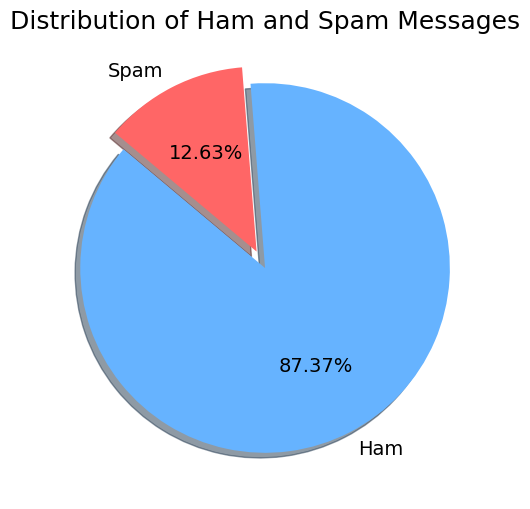

In [20]:
# Define colors
colors = ['#66b3ff','#ff6666']

# Create the pie chart with enhancements
plt.figure(figsize=(8, 6))  # Adjust the size of the pie chart
plt.pie(
    df['target'].value_counts(),
    labels=['Ham', 'Spam'],
    autopct="%0.2f%%",  # Display percentages with two decimal places and a percent sign
    colors=colors,  # Set custom colors
    startangle=140,  # Start the pie chart at a different angle
    explode=(0, 0.1),  # Slightly "explode" the spam section for emphasis
    shadow=True,  # Add a shadow effect for a 3D look
    textprops={'fontsize': 14}  # Increase the font size of the labels
)

# Add a title with custom font size
plt.title('Distribution of Ham and Spam Messages', fontsize=18)

# Show the plot
plt.show()

### Data is imbalanced 

In [21]:
# nlp lib
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\KAUSHAL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
import nltk

print(nltk.data.path)


['C:\\Users\\KAUSHAL/nltk_data', 'c:\\Users\\KAUSHAL\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\KAUSHAL\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\KAUSHAL\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\KAUSHAL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [24]:
df['num_character']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### number of words

In [26]:
import spacy
# Load the English tokenizer from spaCy
nlp = spacy.load("en_core_web_sm")
def spacy_tokenize(text):
    if not isinstance(text, str):
        return []  # Return an empty list if the text is not a string
    return [token.text for token in nlp(text)]

# Apply this tokenizer to your DataFrame
df['num_words'] = df['text'].apply(lambda x: len(spacy_tokenize(x)))
df.head()


,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
import spacy
import pandas as pd

# Load the English tokenizer from spaCy
nlp = spacy.load("en_core_web_sm")

def spacy_sentence_tokenize(text):
    if not isinstance(text, str):
        return []  # Return an empty list if the text is not a string
    doc = nlp(text)
    return [sent.text for sent in doc.sents]


# Apply this tokenizer to your DataFrame and count the number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(spacy_sentence_tokenize(x)))

# Display the DataFrame with the new column
df.head()


,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,3
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.describe()

,target,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.339911,2.122848
std,0.332253,58.236293,13.175170,1.481111
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,2.000000
75%,0.000000,117.000000,26.000000,3.000000
max,1.000000,910.000000,196.000000,31.000000


In [29]:
# ham
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.982728
std,56.358207,13.224373,1.431233
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,31.000000


In [30]:
# spam
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.091884
std,30.137753,7.361204,1.458257
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,8.000000


In [31]:
import seaborn as sns



<Axes: xlabel='num_character', ylabel='Count'>

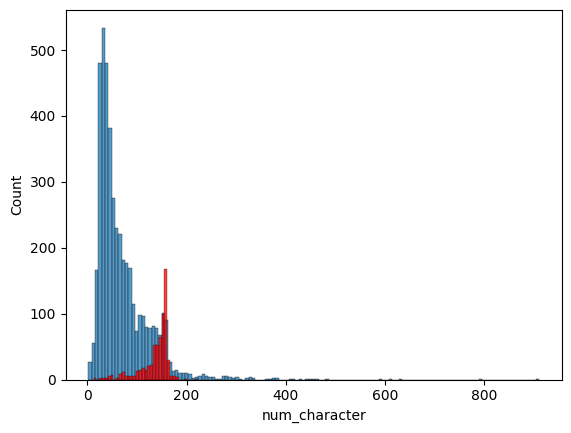

In [32]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

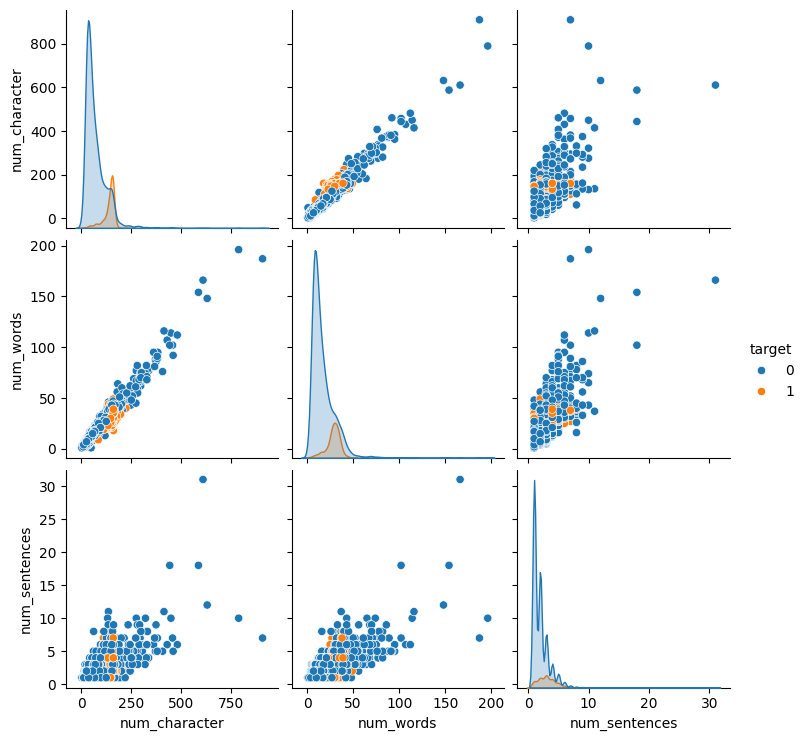

In [33]:
sns.pairplot(df,hue='target')

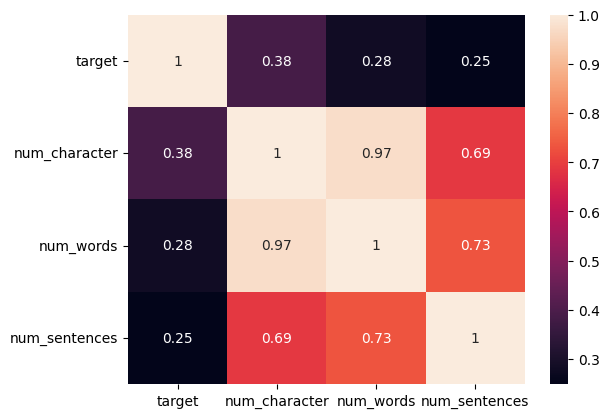

In [34]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 3.Data Preprocessing 

#### . Lower case
#### . Tokenization
#### . Removing special character
#### . Removing stop words and punctuation
#### . Stemming


In [51]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        y.append(PorterStemmer().stem(i))


    return " ".join(y)

In [56]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [55]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [57]:
df['transform_text']=df['text'].apply(transform_text)

In [60]:
df.head()

,target,text,num_character,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,3,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [71]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

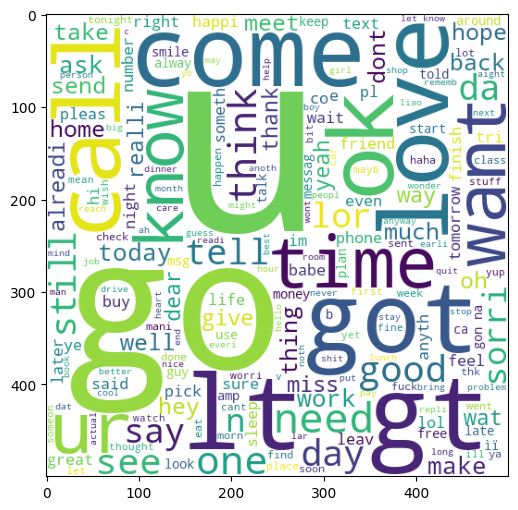

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [76]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

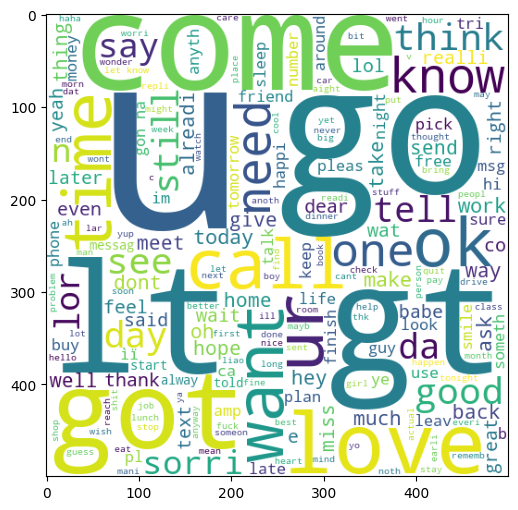

In [77]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [78]:
df.head()

,target,text,num_character,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,3,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [80]:
len(spam_corpus)

9939

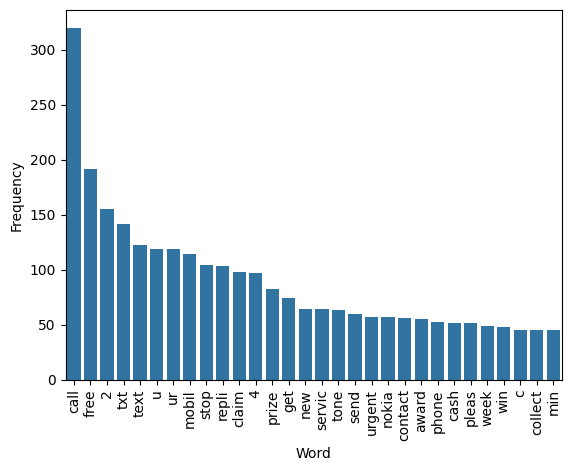

In [84]:
from collections import Counter
sns.barplot(x='Word', y='Frequency', data=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])); plt.xticks(rotation="vertical"); 
plt.show()
